In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm,binom
import matplotlib.pyplot as plt
import math as mt
import itertools

### Load dataset

In [4]:
data=pd.read_csv("C:\\Users\\Acer\\Downloads\\Panion-final-20230421T122412Z-001\\Panion-final\\Notebook-data\\ab_data\\ab_data.csv")

### Explore data

In [5]:
data.shape

(294478, 5)

In [6]:
data.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
data[data['group']=='control']['landing_page'].unique()



array(['old_page', 'new_page'], dtype=object)

In [9]:
df=data.copy()

In [10]:

df[df['group']=="control"]['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [11]:
df[df['group']=="treatment"]['landing_page'].unique()

array(['new_page', 'old_page'], dtype=object)

In [12]:
df=df.drop_duplicates('user_id')

In [13]:
dfexp=df[(df['group']=="treatment") & (df['landing_page']=="new_page")]

In [14]:
dfexp[dfexp['group']=="treatment"]['landing_page'].unique()

array(['new_page'], dtype=object)

In [15]:
dfcom=df[(df['group']=="control")]


### Caclulate Probability and Pooled Probability for both control and treatment groups

In [16]:
## Calculate pool probability
Ppool=df[df['converted']==1]['converted'].count()/df.shape[0]

### Calculate pcon
pcon=dfcom[dfcom['converted']==1]['converted'].count()/dfcom.shape[0] # or dfcom['converted'].mean 
pcon

### Calculate pcexp
pexp=dfexp[dfexp['converted']==1]['converted'].count()/dfexp.shape[0] #or dfexp['converted'].mean 
pexp


0.11872721981235362

In [17]:
A_converted=dfcom[dfcom['converted']==1].shape[0]
A_total=dfcom.shape[0]
A_cr=pcon

B_converted=dfexp[dfexp['converted']==1].shape[0]
B_total=dfexp.shape[0]
B_cr=pexp


### Plot binomial distribuition of contol group and the result of test group in line

Text(0, 0.5, 'probability')

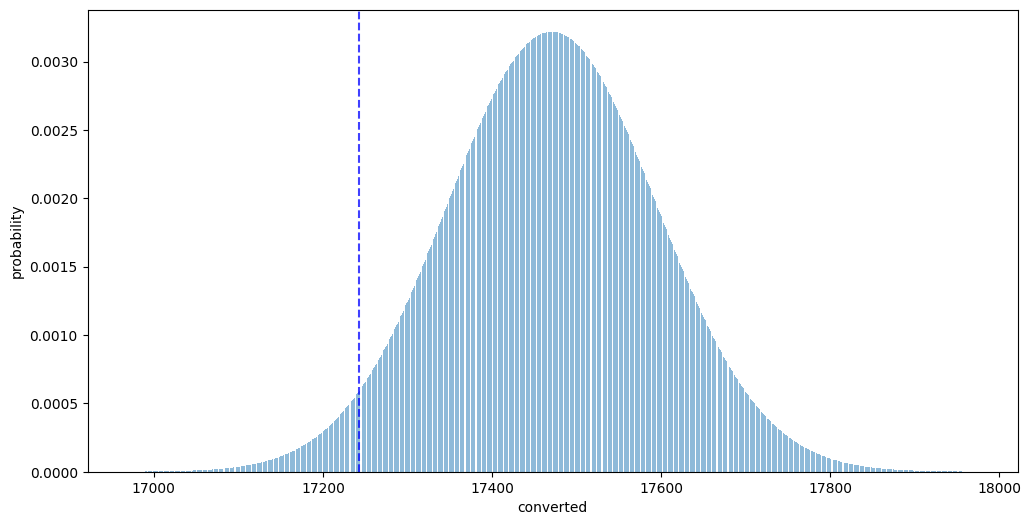

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-499, A_converted+500,1000)
y = binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')


### Plot binomial distribution for both groups and see the overlap and size

Text(0, 0.5, 'probability')

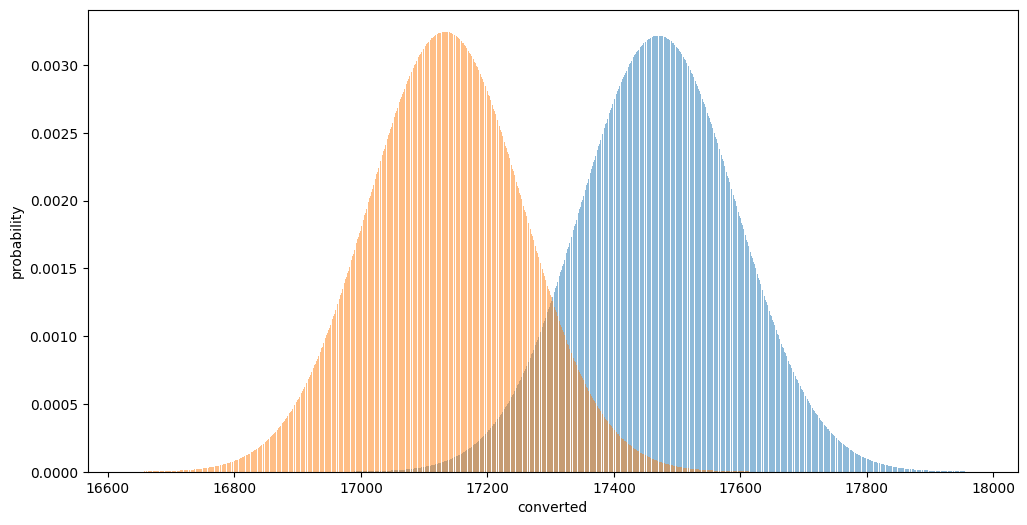

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-499, A_converted+500,1000)
yA = st.binom(A_total, pcon).pmf(xA)
ax.bar(xA, yA, alpha=0.5)

xB = np.linspace(B_converted-499, B_converted+500,1000)
yB = st.binom(B_total, pexp).pmf(xB)
ax.bar(xB, yB, alpha=0.5)


plt.xlabel('converted')
plt.ylabel('probability')

### Plot probability density function  for control and test group
- The overlapping indicates the error which needs to be as small as possible- pvalue the probability of control and test group overlapping

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


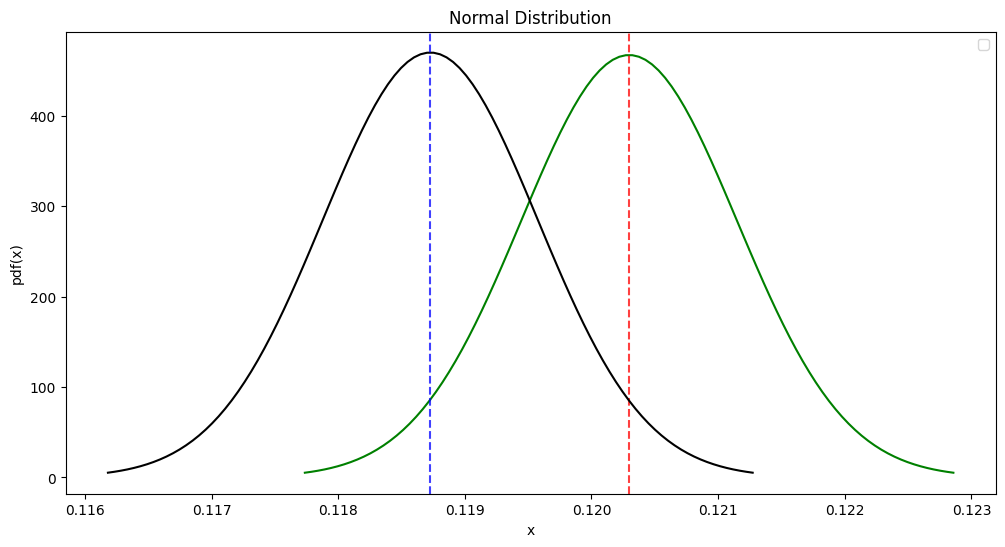

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_cr-SEold*3, A_cr+SEold*3,100)
yA =  st.norm.pdf(xA,pcon,SEold)

plt.plot(xA,st.norm.pdf(xA,pcon,SEold),color='green')

ax.axvline(x=A_cr, c='red', alpha=0.75, linestyle='--')
xB = np.linspace(B_cr-SEnew*3, B_cr+SEnew*3,100)
yB =  st.norm.pdf(xB,pexp,SEnew)
plt.plot(xB,st.norm.pdf(xB,pexp,SEnew),color='black')

ax.axvline(x=B_cr, c='blue', alpha=0.75, linestyle='--')
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
plt.legend(loc='best', frameon=True)      
plt.show()

### Metrics validation- check unique user_id for each group
- Invariant metrics- userid
- Evaluation metrics- conversion rate 
- Inorder to verify invariant metrics check porpotion of control and treatment counts of user_id( our case user_id is unique so we will just check the size of both control and old)
    - calculate SE and CI 
    - alpha= 0.05(from experiment)
- As per Bernoulli distribution p is the conversion probability of control group
     - mean= E(x)=p expcted value(x)= 0.5
     - variance(X)=(p(1-p))
     - The distribution of the sample means, p, will be normally distributed around the true mean with a standard deviation equal to the standard error of the mean.
     - SE=sqrt(p^(1-p^)/N)
     - Binomial CI=p^ ± z sqst( p^(1−p^)n)



In [21]:

N_new = df.query('group == "treatment"').landing_page.count()
N_old = df.query('group == "control"').landing_page.count()
propotion= (N_old/df.shape[0],N_new/df.shape[0])
propotion
# Check if the propotion lie within CI

 
Standarderror= mt.sqrt(0.5*(1-0.5)/df.shape[0])
CI= (0.5-Standarderror*st.norm.ppf(1-0.05/2), 0.5+Standarderror*st.norm.ppf(1-0.05/2))
CI

(0.4981820486936518, 0.5018179513063482)

## Calculate sample size

- Power of test 1-beta = 0.8 (probability of correctly rejecting the null hypothesis. Power is the probability of making a correct decision (to reject the null hypothesis) when the null hypothesis is false.)
- Significance level alpha- 0.05=The significance level which is also the probability of Type I error is the likelihood of rejecting the null, hence detecting a treatment effect, while the null is true and there is no statistically     significant impact).Sgnificance value of 5% which indicates that we have a 5% risk of concluding that there exists a statistically significant difference between the experimental and control variant performances when there is no       actual difference. 
- MDE- minimum detectable effect MDE 0.35 %
- Baseline conversion rate 12%

##### so sample size as per calculation 137926.53061224488

In [22]:
16*(0.12*(1-0.12))/pow(0.0035,2)

137926.53061224488

In [23]:
N_new = df.query('landing_page == "new_page"').landing_page.count()
N_old = df.query('landing_page == "old_page"').landing_page.count()
print("N_new",N_new,'\n',"N_old",N_old)

N_new 145320 
 N_old 145264


In [24]:
convert_old = df.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df.query("landing_page == 'new_page' and converted == 1").shape[0]
print("convert_old",convert_old,'\n',"convert_new",convert_new)

convert_old 17489 
 convert_new 17256


### Ztest
- Given P value is greater than 0.05 we do not reject null hypothesis

In [25]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [N_old, N_new], alternative='smaller')
z_score, p_value

(1.3704617576931086, 0.9147285973840954)

### Ztest for comparing proportion of 2 sided.
- Comparing the control and experiment group which are in the form of propotitions ( click or no click), basically comparing probability for 2 groups
    - Ho= pcon=pexp
    - H1: pcon!= pexp

    - H0: pcon-pex=0
    - H1: pcon-pexp!=0


In [26]:
## calculate variance

SEnew=mt.sqrt((pexp*(1-pexp))/N_new)
SEold=mt.sqrt((pcon*(1-pcon))/N_old)

pooled_variance = Ppool*(1-Ppool) * (1/N_old + 1/N_new)
SE=np.sqrt(pooled_variance)
print("pooled SE",SE)
teststat=(pcon - pexp)/SE
Z_crit = norm.ppf(1-0.05/2)
print("Z_crit",Z_crit)
m = SE * Z_crit
d_hat = pexp - pcon
print("d_hat",d_hat)
p = 1 - st.f.cdf(pow(SEnew,2)/pow(SEold,2), N_new - 1, N_old - 1)
print("p-value",p)
CI_diff = (d_hat - norm.ppf(1-0.05/2)*SE, d_hat + norm.ppf(1-0.05/2)*SE)
print("CI_diff",CI_diff)

pooled SE 0.001203793487921439
Z_crit 1.959963984540054
d_hat -0.0015699598725642944
p-value 0.9873654547861549
CI_diff (-0.003929351753714167, 0.0007894320085855785)


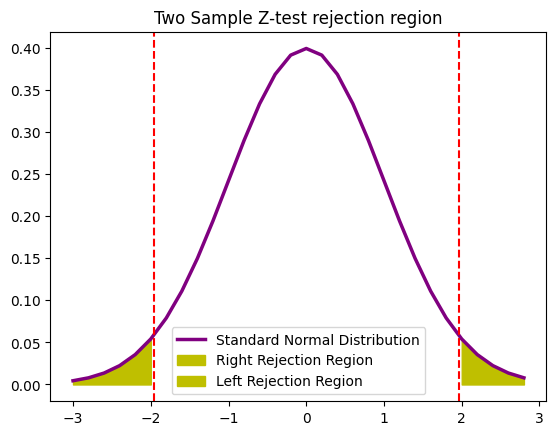

In [27]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.2)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.axvline(x=Z_crit,color='r',linestyle='dashed')
plt.axvline(x=-Z_crit,color='r',linestyle='dashed')
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

#### Sign test
 Checking the trend of change we observe by day, check the number of days when the click count 1 is higher in experiment compared to control  and perform 1 sdied and 2 sided value

In [28]:
dsign=df[['timestamp','group','converted']]
dsign['timestamp']=pd.to_datetime(dsign['timestamp']).dt.date
dsign1=dsign.groupby(['timestamp','group'])['converted'].sum().reset_index()
dsign1=dsign1.pivot(index=['timestamp'],columns=['group'],values=['converted']).reset_index()
dsign1['sign'] = np.where(dsign1[('converted','treatment')] >= dsign1[('converted','control')], 1,0)
successes = dsign1[('sign','')].sum()
p_sign = successes/dsign1.shape[0]

C:\Users\Acer\AppData\Local\Temp\ipykernel_16068\2715431310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsign['timestamp']=pd.to_datetime(dsign['timestamp']).dt.date


In [29]:
#binomial distribution:
def bin(x,n):
    # print(mt.factorial(n)/(mt.factorial(x)*mt.factorial(n-x))*0.5**x*0.5**(n-x))
    return mt.factorial(n)/(mt.factorial(x)*mt.factorial(n-x))*0.5**x*0.5**(n-x)
    

#sum all successes up until our desired success:   
def get_1side_pvalue(x,n):
    # print(list(itertools.accumulate([bin(i,n) for i in range(0,x+1)]))[-1])
    return list(itertools.accumulate([bin(i,n) for i in range(0,x+1)]))[-1]


print('The two-sided P-value is ' + str(round(2*get_1side_pvalue(successes,dsign1.shape[0]),4)))
print('The one-sided P-value is ' + str(round(get_1side_pvalue(successes,dsign1.shape[0]),4)))

The two-sided P-value is 0.21
The one-sided P-value is 0.105


#### Pvalue is greater than 0.05 we do not reject the Null Hypothesis that there is no difference between the groups.This means that the new page is not better than the old page, can you online calculator- to calculcate one sided and 2 sided pvalue
https://www.graphpad.com/quickcalcs/binomial2/

#### Chi-Squared Test:

In [30]:
controlconverted=df[(df['group']=='control') &  (df['converted']==1)]['converted'].count()
controlnotconverted=df[df['group']=='control'].shape[0]-controlconverted
treatmentconverted=df[(df['group']=='treatment') &  (df['converted']==1)]['converted'].count()
treatmentnotconverted=df[df['group']=='treatment'].shape[0]-treatmentconverted

In [31]:
chi=np.array([[treatmentconverted,treatmentnotconverted],[controlconverted,controlnotconverted]])
st.chi2_contingency(chi,correction=False)[1]

0.22689933216132582

##### 0.22689933216132582>0.05 so we do not reject the Null Hypothesis that the assigned treatment/control group has no effect on conversion.